In [1]:
import pandas as pd
import numpy as np
import mlxtend.frequent_patterns as mlx
import matplotlib.pyplot as plt

In [144]:
df = pd.read_csv('/Users/ice/Desktop/Clean Data/combine.csv')
df.head()

,[order_no*],[order_date*],[order_net*],[status*],[payment_time*],[Bank*],[payment_type*],[name*],[address*],[sub_district*],...,[quantity*],[NormalPrice*],[Price*],[totalPrice*],[Ship Cost*],[Discount*],[Warehouse*],[note*],[Full ShippingAddress*],[Full BillingAddress*]
0,210327S00043X43,27/03/2021,1190,จัดส่งแล้ว,2021-03-27 20:20:00,ธนาคารไทยพาณิชย์,Direct Transfer,Yanisa Riewruja,เลขที่ 16/16 สุขุมวิท 19,แขวง คลองเตยเหนือ,...,1,1190,1190,1190,60,0.0,ONLINE,EB457348655TH,เลขที่ 16/16 สุขุมวิท 19 แขวง คลองเตยเหนือ เขต...,NaN
1,210327S00044X44,27/03/2021,1190,จัดส่งแล้ว,2021-03-27 22:29:00,NaN,Credit/Debit Card,วิกาวี วัฒนวิจารณ์,เลขที่ 9/387 พลัมคอนโดปิ่นเกล้าสเตชั่น ถ.สมเด็...,แขวง บางยี่ขัน,...,1,1190,1190,1190,60,0.0,ONLINE,SHIPOP0077955,เลขที่ 9/387 พลัมคอนโดปิ่นเกล้าสเตชั่น ถ.สมเด็...,NaN
2,210328U00046X46,28/03/2021,1190,ยกเลิก,NaN,NaN,Credit/Debit Card,Sedthalug N.,เลขที่ 70 ซอยเสนานิคม 1 ซอย 42 แยก 11 (ซอย 8/6...,แขวง ลาดพร้าว,...,1,1190,1190,1190,60,0.0,ONLINE,NaN,เลขที่ 70 ซอยเสนานิคม 1 ซอย 42 แยก 11 (ซอย 8/6...,NaN
3,210328U00047X47,28/03/2021,1190,จัดส่งแล้ว,2021-03-28 18:23:00,NaN,Credit/Debit Card,Sedthalug N.,เลขที่ 70 ซอยเสนานิคม 1 ซอย 42 แยก 11 (ซอย 8/6...,แขวง ลาดพร้าว,...,1,1190,1190,1190,40,0.0,ONLINE,RF692775275TH,เลขที่ 70 ซอยเสนานิคม 1 ซอย 42 แยก 11 (ซอย 8/6...,NaN
4,210329M00048X48,29/03/2021,1400,ยกเลิก,NaN,NaN,Direct Transfer,Fay,เลขที่ 441/34 boromtai,ต.ในเมือง,...,1,1400,1400,1400,60,0.0,ONLINE,NaN,เลขที่ 441/34 boromtai ต.ในเมือง อ.เมืองพิษณุโ...,NaN


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   [order_no*]              195 non-null    object 
 1   [order_date*]            195 non-null    object 
 2   [order_net*]             195 non-null    int64  
 3   [status*]                195 non-null    object 
 4   [payment_time*]          132 non-null    object 
 5   [Bank*]                  61 non-null     object 
 6   [payment_type*]          195 non-null    object 
 7   [name*]                  195 non-null    object 
 8   [address*]               195 non-null    object 
 9   [sub_district*]          195 non-null    object 
 10  [district*]              195 non-null    object 
 11  [province*]              195 non-null    object 
 12  [zip*]                   195 non-null    object 
 13  [phone*]                 195 non-null    object 
 14  [require_bill*]          1

In [151]:
df2 = df.groupby('[Product Name*]')['[Product Name*]'].count()
print(df2)

[Product Name*]
Abang Large Tote Bag Color Multi(ABANG) Scale Large             1
Angle wings Scale Cup A                                         1
BODY WASH Color No Color(NOC) Scale 250 ml                      1
BOND Men’s Intimate Wash  Color No Color(NOC) Scale 10 pcs      1
BOOK SPECTRUM x Roger Major Tom Color Multi color(MUR)          4
                                                               ..
UNISEX SLEEVELESS LASER CUT TOP Color White Size Free size      1
Waving Pride Flag Scale pcs                                     8
Weho Pink Swim Shorts Color Pink(WEP) Size X-large              2
YELLOW DUCK T-SHIRT Color Black Size Small                      1
เจนเด้อ Sticker (Gender Sticker) A5   Scale 1 pcs               2
Name: [Product Name*], Length: 98, dtype: int64


In [164]:
def clean(x):
    if "Color" in x:
        sub_str = "Color"
        res = x[:x.index(sub_str)]
        return res
    elif "Size" in x:
        sub_str = "Size"
        res = x[:x.index(sub_str)]
        return res
    elif "Scale" in x:
        sub_str = "Scale"
        res = x[:x.index(sub_str)]
        return res
        
print(clean('T-Shirt SPECTRUM x Nakrob Moonmanas Color Black(BLK) Size X-large'))

T-Shirt SPECTRUM x Nakrob Moonmanas 


In [167]:
df['Product Name'] = df['[Product Name*]'].apply(clean)
# df1 = df.loc[:,['[order_no*]','[Product Name*]','[quantity*]']]
# df = df.pivot(columns='[order_no*]',values='[Product Name*]')
# dfc = df.groupby('[order_no*]')['[Product Name*]'].apply(lambda x : ','.join(x)).reset_index()
# dfc.head(60)


# market_basket = df.groupby(['[order_no*]','[Product Name*]'])['[quantity*]']
# market_basket = market_basket.sum().unstack().reset_index().fillna(0).set_index('[order_no*]')
# market_basket

df1 = df.loc[:,['[order_no*]','Product Name','[quantity*]']]
market_basket = df.groupby(['[order_no*]','Product Name'])['[quantity*]']
market_basket = market_basket.sum().unstack().reset_index().fillna(0).set_index('[order_no*]')
market_basket


Product Name,Abang Large Tote Bag,Angle wings,BODY WASH,BOND Men’s Intimate Wash,BOOK SPECTRUM x Roger Major Tom,BTTMLN101,BTTMLN365,Balm,Brest - Covered Bra,Butt Lifter Padded Briefs,...,Super 7 Moisture Essence Oil Toner,T-Shirt SPECTRUM x Nakrob Moonmanas,T-Shirt SPECTRUM x Roger Major Tom,Teenage reve jumpsuit,Tripeptide Cream,UNISEX SLEEVELESS LASER CUT TOP,Waving Pride Flag,Weho Pink Swim Shorts,YELLOW DUCK T-SHIRT,เจนเด้อ Sticker (Gender Sticker) A5
[order_no*],,,,,,,,,,,,,,,,,,,,,
210318R00001X1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210318R00002X2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210318R00003X3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210318R00004X4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210318R00005X5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210624R00140X140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
210624R00141X141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
210625F00142X142,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [168]:
# clean data greater than 1 or lower than 0 since Apriori can only use 0 and 1
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

market_basket = market_basket.applymap(encode_data)

In [194]:
itemsets = mlx.apriori(market_basket, min_support=0.009, use_colnames=True)
itemsets

,support,itemsets
0,0.028169,(BOOK SPECTRUM x Roger Major Tom )
1,0.014085,(Brest - Covered Bra )
2,0.014085,(CONDITIONER )
3,0.014085,(Call me by your name 2 )
4,0.014085,(Crayola multicolor Underwear Briefs )
5,0.035211,(FACE WASH )
6,0.014085,(Glitter Rainbow Bra )
7,0.014085,(Gray bra top )
8,0.014085,(Korean Fan )
9,0.014085,(Microalgae Essence )


In [208]:
rules = mlx.association_rules(itemsets, metric="confidence", min_threshold=0.5)
rules[rules['conviction'] != float('inf')]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(FACE WASH ),(Shampoo Botanical Scent ),0.035211,0.035211,0.028169,0.800000,22.720000,0.026929,4.823944
2,(Shampoo Botanical Scent ),(FACE WASH ),0.035211,0.035211,0.028169,0.800000,22.720000,0.026929,4.823944
4,(People Made Pride Sticker A5 ),(เจนเด้อ Sticker (Gender Sticker) A5 ),0.021127,0.014085,0.014085,0.666667,47.333333,0.013787,2.957746
5,(Pride With Peace ),(Pride Flag ),0.028169,0.028169,0.014085,0.500000,17.750000,0.013291,1.943662
6,(Pride Flag ),(Pride With Peace ),0.028169,0.028169,0.014085,0.500000,17.750000,0.013291,1.943662
7,(Pride Flag ),(Waving Pride Flag ),0.028169,0.056338,0.014085,0.500000,8.875000,0.012498,1.887324
8,(Pride With Peace ),(Waving Pride Flag ),0.028169,0.056338,0.021127,0.750000,13.312500,0.019540,3.774648
10,(Sticker A5 Q ),(Sticker A5 Freiheit ),0.021127,0.014085,0.014085,0.666667,47.333333,0.013787,2.957746


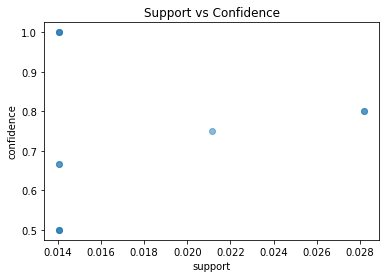

In [196]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

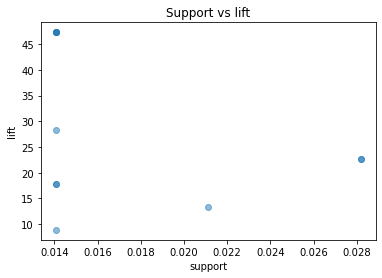

In [197]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs lift')
plt.show()

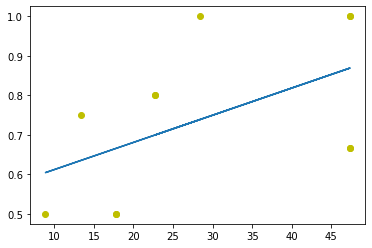

In [198]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))